In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
sns.set()

In [3]:
results = pd.read_csv(r'results\result_choose_model_params.csv', index_col=['Unnamed: 0'])
scores = ['accuracy', 'recall', 'precision', 'F1_score']

for score in scores:
    results[score] = results[score].apply(eval)

results.head()

,n_samples,n_mfcc,hop_win,len_win,n_iter,n_hidden,accuracy,recall,precision,F1_score
0,20.0,13.0,0.01,0.025,15.0,4.0,"[0.7, 0.7, 0.7, 0.7, 0.7]","[0.7, 0.7, 0.7, 0.7, 0.7]","[0.925, 0.8833333333333332, 0.8833333333333332...","[0.64, 0.6166666666666666, 0.6166666666666666,..."
1,20.0,13.0,0.01,0.025,15.0,6.0,"[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]"
2,20.0,13.0,0.01,0.025,15.0,12.0,"[0.9, 0.9, 1.0, 1.0, 0.9]","[0.9, 0.9, 1.0, 1.0, 0.9]","[0.95, 0.95, 1.0, 1.0, 0.95]","[0.8666666666666666, 0.8666666666666666, 1.0, ..."
3,20.0,13.0,0.01,0.025,30.0,4.0,"[0.8, 0.7, 0.8, 0.8, 0.8]","[0.8, 0.7, 0.8, 0.8, 0.8]","[0.9333333333333332, 0.8833333333333332, 0.933...","[0.75, 0.6166666666666666, 0.75, 0.75, 0.75]"
4,20.0,13.0,0.01,0.025,30.0,6.0,"[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]"


# Tex table genrators

In [6]:
def latex_table_generator_comparison(df):
    table = r"""\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} """
    
    table += r"\textbf{" + r"$\beta$" + r"} & "
    for i, column in enumerate(df.columns, 1):
        if i == len(df.columns):
            table += r"\textbf{" + str(column) + r"} \\ \hline" + "\n"
        else:
            table += r"\textbf{" + str(column) + "} & " 
    table += r"\rowcolor[HTML]{C0C0C0}"
    table += r"$\mathbf{\mathit{SNR}_{dB}}$ " + r"} " + " & \multicolumn{5}{c|}{}"
    table += "\\\\ \\hline \n"
    for row in df.iterrows():
        table += r"\cellcolor[HTML]{EFEFEF}" + str(row[0]) + " & "
        for i, num in enumerate(row[1], 1):
            if i == len(row[1]):
                if num == 0:
                    table += r"\cellcolor[HTML]{FFFC9E}" + str(np.round(num, 3))
                elif num > 0:
                    table += r"\cellcolor[HTML]{9AFF99}" + str(np.round(num, 3))
                else:
                    table += r"\cellcolor[HTML]{FFCCC9}" + str(np.round(num, 3))
            else:
                if num == 0:
                    table += r"\cellcolor[HTML]{FFFC9E}" + str(np.round(num, 3)) + " & "
                elif num > 0:
                    table += r"\cellcolor[HTML]{9AFF99}" + str(np.round(num, 3)) + " & "
                else:
                    table += r"\cellcolor[HTML]{FFCCC9}" + str(np.round(num, 3)) + " & "
        table += "\\\\ \\hline \n"
    table += r"""\end{tabular}
\caption{}
\label{tab:}
\end{table}"""
    print(table)

In [7]:
def latex_table_generator(df, columns, index):
    table = r"""\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} """
    for id_ in index:
        table += r"\textbf{" + id_ + r"} & "
    for i, column in enumerate(columns, 1):
        if i == len(columns):
            table += r"\textbf{" + column + "}"
        else:
            table += r"\textbf{" + column + "} & " 
    table += "\\\\ \\hline \n"
    for row in df.iterrows():
        table += r"\cellcolor[HTML]{EFEFEF}" + str(row[0]) + " & "
        for i, num in enumerate(row[1], 1):
            if i == len(row[1]):
                table += str(np.round(num, 3))
            else:
                table += str(np.round(num, 3)) + " & "
        table += "\\\\ \\hline \n"
    table += r"""\end{tabular}
\caption{}
\label{tab:}
\end{table}"""
    print(table)

In [8]:
def latex_table_generator_multirow(df, columns, index, multi):
    table = r"""\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} """
    for id_ in index:
        table += r"\textbf{" + id_ + r"} & "
    for i, column in enumerate(columns, 1):
        if i == len(columns):
            table += r"\textbf{" + column + "}"
        else:
            table += r"\textbf{" + column + "} & " 
    table += "\\\\ \\hline \n"
    for k, row in enumerate(df.iterrows(), 1):
        if k % multi == 0:
            table += r"\multirow{-" + str(multi) + "}{*}{\cellcolor[HTML]{EFEFEF}" + str(row[0][0]) + "} & "
        else:
            table += r"\cellcolor[HTML]{EFEFEF}" +  " & "
        table += r"\cellcolor[HTML]{EFEFEF}" + str(row[0][1]) + " & "
        for i, num in enumerate(row[1], 1):
            if i == len(row[1]):
                table += str(np.round(num, 3))
            else:
                table += str(np.round(num, 3)) + " & "
        if k % multi == 0:
            table += "\\\\ \\hline \n"
        else:
            table += "\\\\ \\cline{2-6} \n"
    table += r"""\end{tabular}
\caption{}
\label{tab:}
\end{table}"""
    print(table)

# Visualizations - model selecting

In [7]:
params = {'n_samples':[20, 100, 200],
          'n_mfcc':[13],
          'hop_wins':[0.01, 0.03, 0.05],
          'len_wins':[0.025, 0.04],
          'n_iters':[15, 30, 50],
          'n_hiddens':[4, 6, 12]}
params

{'n_samples': [20, 100, 200],
 'n_mfcc': [13],
 'hop_wins': [0.01, 0.03, 0.05],
 'len_wins': [0.025, 0.04],
 'n_iters': [15, 30, 50],
 'n_hiddens': [4, 6, 12]}

In [8]:
ints = ['n_samples', 'n_mfcc', 'n_iter', 'n_hidden']
numeric = ['hop_win', 'len_win']
lists = ['accuracy', 'recall', 'precision', 'F1_score']

results[ints] = results[ints].astype('int64')
results[numeric] = results[numeric].astype('float64')
for i in lists:
    results[i] = results[i].apply(lambda x: np.round(x, 3))    

In [9]:
results.head()

,n_samples,n_mfcc,hop_win,len_win,n_iter,n_hidden,accuracy,recall,precision,F1_score
0,20,13,0.01,0.025,15,4,"[0.7, 0.7, 0.7, 0.7, 0.7]","[0.7, 0.7, 0.7, 0.7, 0.7]","[0.925, 0.883, 0.883, 0.883, 0.888]","[0.64, 0.617, 0.617, 0.617, 0.62]"
1,20,13,0.01,0.025,15,6,"[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]"
2,20,13,0.01,0.025,15,12,"[0.9, 0.9, 1.0, 1.0, 0.9]","[0.9, 0.9, 1.0, 1.0, 0.9]","[0.95, 0.95, 1.0, 1.0, 0.95]","[0.867, 0.867, 1.0, 1.0, 0.867]"
3,20,13,0.01,0.025,30,4,"[0.8, 0.7, 0.8, 0.8, 0.8]","[0.8, 0.7, 0.8, 0.8, 0.8]","[0.933, 0.883, 0.933, 0.933, 0.933]","[0.75, 0.617, 0.75, 0.75, 0.75]"
4,20,13,0.01,0.025,30,6,"[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]"


- jak zmienia się stabilność wyników modeli w zależności od n_samples
    - boxplotu z podziałem na n_samples
    - modelom nadać indeks

In [10]:
results['id'] = results.index

In [11]:
results['k'] = results['n_samples'].apply(lambda x: [1, 2, 3, 4 ,5])

In [12]:
scores = ['accuracy', 'recall', 'precision', 'F1_score']

In [13]:
result_expand = results.explode(scores + ['k']).reset_index(drop=True)

## Wykres 1

- pointplot
- liczba obserwacji od skoku S z podziałem na miary

Wnioski:
- 20 obs - za mało
- 100 - optymalnie
- 200 - czasami może się przetrenować

zgodne z intuicją

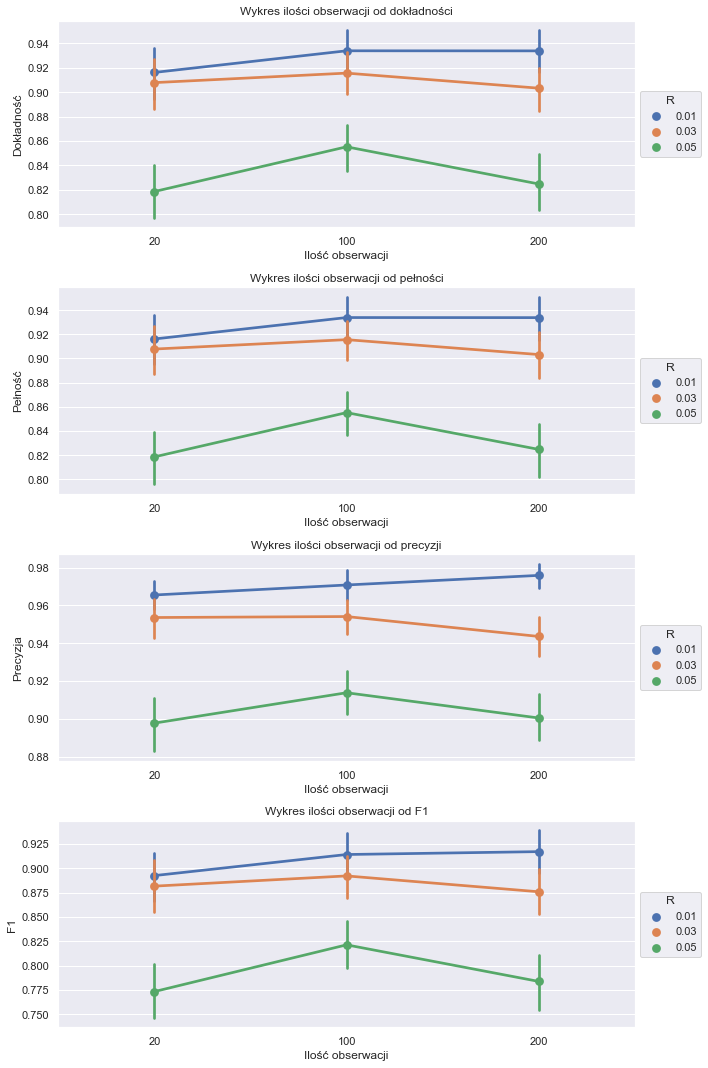

In [14]:
ylabels = ['Dokładność', 'Pełność', 'Precyzja', 'F1']
titles = ['dokładności', 'pełności', 'precyzji', 'F1']


fig, ax = plt.subplots(4, 1, figsize=(10, 15))
ax = ax.flatten()

for axis , ylabel, title, score in zip(ax, ylabels, titles, scores):
    sns.pointplot(x='n_samples',
                    y=score,
                    hue='hop_win',
                    data=result_expand,
                    ax=axis)
    axis.set_title(f'Wykres ilości obserwacji od {title}')
    axis.set_xlabel('Ilość obserwacji')
    axis.set_ylabel(ylabel)
    axis.legend(title='R', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [15]:
fig.savefig(r'vis\czyste_point_n_S_score.png')

## Tabela do wykresu 1

tabele średnich dokładności:

- podział  na średnią i std
- S
- R

Wnioski:

- najoptymalniej iść zgodnie z teorią i wybieraś R = 0.01 i S = 0.025
- średnie są wtedy największe
- std jest wtedy najmniejsze

In [46]:
results_mean = results.copy()
for score in scores:
    results_mean[f'{score}_mean'] = results_mean[score].apply(lambda x: np.mean(x))
    results_mean[f'{score}_std'] = results_mean[score].apply(lambda x: np.std(x))    
results_mean = results_mean.drop(scores + ['k', 'n_mfcc', 'id'], axis=1)

In [50]:
mask = results_mean['n_samples'] == 100
temp = results_mean[mask].groupby(['hop_win', 'len_win'])[[f'{score}_mean' for score in scores]].max()
temp

accuracy_mean  recall_mean  precision_mean  F1_score_mean
hop_win len_win                                                           
0.01    0.025            1.000        1.000          1.0000         1.0000
        0.040            1.000        1.000          1.0000         1.0000
0.03    0.025            0.984        0.984          0.9882         0.9832
        0.040            0.980        0.980          0.9900         0.9734
0.05    0.025            0.909        0.909          0.9360         0.8946
        0.040            0.954        0.954          0.9714         0.9436

In [82]:
latex_table_generator_multirow(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'], ['R', 'S'], 2)

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{R} & \textbf{S} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}0.025 & 1.0 & 1.0 & 1.0 & 1.0\\ \cline{2-6} 
\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}0.01} & \cellcolor[HTML]{EFEFEF}0.04 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}0.025 & 0.984 & 0.984 & 0.988 & 0.983\\ \cline{2-6} 
\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}0.03} & \cellcolor[HTML]{EFEFEF}0.04 & 0.98 & 0.98 & 0.99 & 0.973\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}0.025 & 0.909 & 0.909 & 0.936 & 0.895\\ \cline{2-6} 
\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}0.05} & \cellcolor[HTML]{EFEFEF}0.04 & 0.954 & 0.954 & 0.971 & 0.944\\ \hline 
\end{tabular}
\caption{}
\label{tab:}
\end{table}


In [83]:
temp = results_mean[mask].groupby(['hop_win', 'len_win'])[[f'{score}_std' for score in scores]].min()
temp

accuracy_std  recall_std  precision_std  F1_score_std
hop_win len_win                                                       
0.01    0.025        0.000000    0.000000       0.000000      0.000000
        0.040        0.000000    0.000000       0.000000      0.000000
0.03    0.025        0.019849    0.019849       0.012123      0.021423
        0.040        0.002000    0.002000       0.006911      0.005426
0.05    0.025        0.035861    0.035861       0.020209      0.049447
        0.040        0.048000    0.048000       0.013401      0.055816

In [84]:
latex_table_generator_multirow(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'], ['R', 'S'], 2)

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{R} & \textbf{S} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}0.025 & 0.0 & 0.0 & 0.0 & 0.0\\ \cline{2-6} 
\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}0.01} & \cellcolor[HTML]{EFEFEF}0.04 & 0.0 & 0.0 & 0.0 & 0.0\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}0.025 & 0.02 & 0.02 & 0.012 & 0.021\\ \cline{2-6} 
\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}0.03} & \cellcolor[HTML]{EFEFEF}0.04 & 0.002 & 0.002 & 0.007 & 0.005\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}0.025 & 0.036 & 0.036 & 0.02 & 0.049\\ \cline{2-6} 
\multirow{-2}{*}{\cellcolor[HTML]{EFEFEF}0.05} & \cellcolor[HTML]{EFEFEF}0.04 & 0.048 & 0.048 & 0.013 & 0.056\\ \hline 
\end{tabular}
\caption{}
\label{tab:}
\end{table}


## Wykres 2 - odpowiednie parametry modelu

Boxploty ukrytych stanów od ilości iteracji dla n=100

Wnioski:

- modele w wiekszości dobrze sprawdzają się dla n_hidden=6
- dużo większe zróżnicowanie w wynikach pojawia się jak n_hidden są większe
- średnio jednak wyniki nie różnią się między  n_hidden=4 i 12

In [21]:
mask = results_mean['n_samples'] == 100

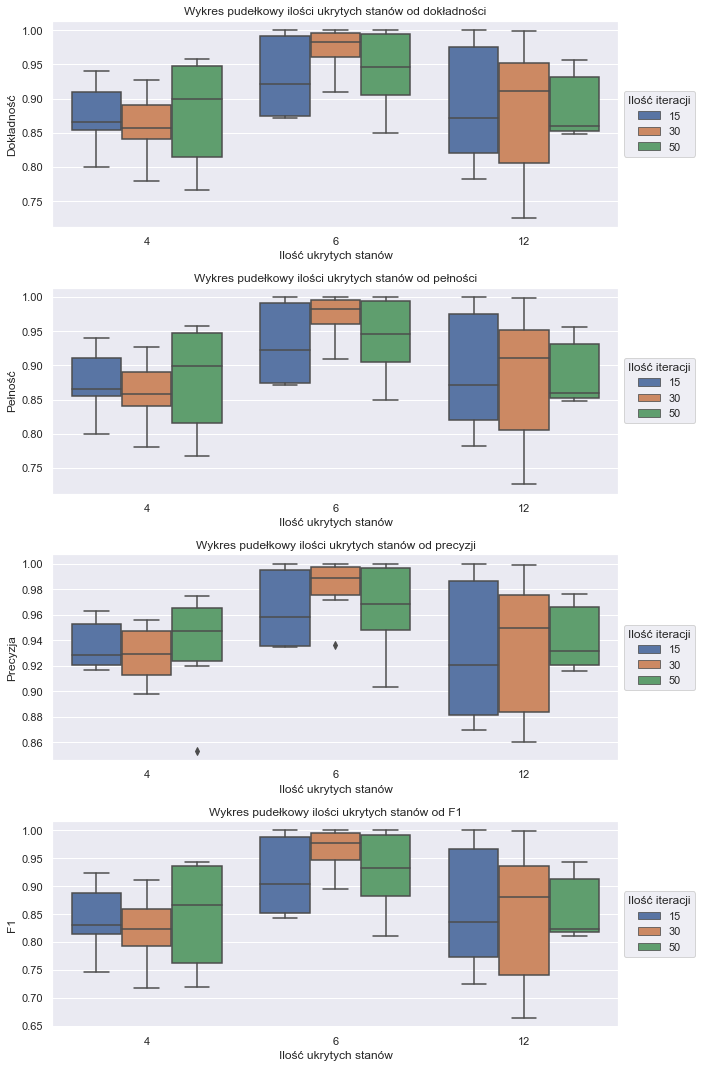

In [22]:
ylabels = ['Dokładność', 'Pełność', 'Precyzja', 'F1']
titles = ['dokładności', 'pełności', 'precyzji', 'F1']


fig, ax = plt.subplots(4, 1, figsize=(10, 15))
ax = ax.flatten()

for axis , ylabel, title, score in zip(ax, ylabels, titles  , [f'{score}_mean' for score in scores]):
    sns.boxplot(x='n_hidden',
                    y=score,
                    data=results_mean[mask],
                    hue='n_iter',
                    ax=axis)
    axis.set_title(f'Wykres pudełkowy ilości ukrytych stanów od {title}')
    axis.set_xlabel('Ilość ukrytych stanów')
    axis.set_ylabel(ylabel)
    axis.legend(title='Ilość iteracji', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [23]:
fig.savefig(r'vis\czyste_box_hidden_iteracje.png')

## Tabela do wykresu 2

Tabele n_hidden, n_iter dla modelu z n=100, R=0.01, S=0.025. Podział na średnie i std

Wnioski:

- n_hidden=6 osiąga dla każdej miary perfekcyjne wyniki
- stąd od razu wynika, że std jest równe 0
- dla tego akurat modelu n_hidden=12 radzi sobie lepiej od 4
- co nie zmienia faktu, że w ogólności gorzej od 6 i warto zwrócić uwagę, że dla n_hidden=12 jest dużo do liczenia
- ciekawą obserwacją jest, że wraz ze wzrostem n_iter otrzymujemy coraz gorsze wyniki

In [85]:
mask = (results_mean['n_samples'] == 100) & (results_mean['hop_win'] == 0.01) & (results_mean['len_win'] == 0.025)

In [86]:
temp = results_mean[mask].groupby(['n_hidden', 'n_iter'])[[f'{score}_mean' for score in scores]].max()
temp

accuracy_mean  recall_mean  precision_mean  F1_score_mean
n_hidden n_iter                                                           
4        15              0.800        0.800          0.9264         0.7466
         30              0.780        0.780          0.9098         0.7166
         50              0.800        0.800          0.9198         0.7432
6        15              1.000        1.000          1.0000         1.0000
         30              1.000        1.000          1.0000         1.0000
         50              1.000        1.000          1.0000         1.0000
12       15              1.000        1.000          1.0000         1.0000
         30              0.999        0.999          0.9990         0.9990
         50              0.954        0.954          0.9754         0.9406

In [89]:
latex_table_generator_multirow(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'],
                               [r'\textit{n\_components}', r'\textit{n\_iter}'], 3)

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{\textit{n\_components}} & \textbf{\textit{n\_iter}} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}15 & 0.8 & 0.8 & 0.926 & 0.747\\ \cline{2-6} 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}30 & 0.78 & 0.78 & 0.91 & 0.717\\ \cline{2-6} 
\multirow{-3}{*}{\cellcolor[HTML]{EFEFEF}4} & \cellcolor[HTML]{EFEFEF}50 & 0.8 & 0.8 & 0.92 & 0.743\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}15 & 1.0 & 1.0 & 1.0 & 1.0\\ \cline{2-6} 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}30 & 1.0 & 1.0 & 1.0 & 1.0\\ \cline{2-6} 
\multirow{-3}{*}{\cellcolor[HTML]{EFEFEF}6} & \cellcolor[HTML]{EFEFEF}50 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}15 & 1.0 & 1.0 & 1.0 & 1.0\\ \cline{2-6} 
\cellcolor[HTML]{EFEFEF} & \cellcolor[HTML]{EFEFEF}30 & 0.999 & 0.

In [26]:
results_mean[mask].groupby(['n_hidden', 'n_iter'])[[f'{score}_std' for score in scores]].max()

accuracy_std  recall_std  precision_std  F1_score_std
n_hidden n_iter                                                       
4        15          0.000000    0.000000       0.013200      0.006800
         30          0.040000    0.040000       0.019934      0.050377
         50          0.000000    0.000000       0.016167      0.008328
6        15          0.000000    0.000000       0.000000      0.000000
         30          0.000000    0.000000       0.000000      0.000000
         50          0.000000    0.000000       0.000000      0.000000
12       15          0.000000    0.000000       0.000000      0.000000
         30          0.002000    0.002000       0.002000      0.002000
         50          0.045431    0.045431       0.022375      0.061151

## Wniosek 

wybieramy model z parametrami:
- n = 100
- R = 0.01
- S = 0.025
- n_iter = 15
- n_hidden = 6

# Visualizations -  Randomization

In [14]:
params = {
    'random_horizontal_shift': [0.1, 0.25, 0.4],
    'random_vertical_scaling': [0.5, 1, 10],
    'n_iter' : [15, 30, 50],
    'n_hiddens': [5, 6, 7]
}

results = pd.read_csv(r'results\result_randomness.csv', 
                     index_col=['Unnamed: 0'])

ints = ['n_iter', 'n_hiddens']
numeric = ['random_horizontal_shift', 'random_vertical_scaling']
scores = ['accuracy', 'recall', 'precision', 'F1_score']

results[ints] = results[ints].astype('int64')
results[numeric] = results[numeric].astype('float64')
for i in scores:
    results[i] = results[i].apply(lambda x: np.round(x, 3))    

In [15]:
results.columns

Index(['random_horizontal_shift', 'random_vertical_scaling', 'n_iter',
       'n_hiddens', 'accuracy', 'recall', 'precision', 'F1_score'],
      dtype='object')

In [24]:
results['dataset_id'] = 1
i = 1
for rhs in params['random_horizontal_shift']:
    for rvs in params['random_vertical_scaling']:
        mask = (results['random_vertical_scaling'] == rvs) & (results['random_horizontal_shift'] == rhs)  
        results.loc[mask, 'dataset_id'] = i
        i += 1

## Wykres 1

In [33]:
results.groupby(by=['dataset_id'])[['random_horizontal_shift', 'random_vertical_scaling']].max()

,random_horizontal_shift,random_vertical_scaling
dataset_id,,
1,0.10,0.5
2,0.10,1.0
3,0.10,10.0
4,0.25,0.5
5,0.25,1.0
6,0.25,10.0
7,0.40,0.5
8,0.40,1.0
9,0.40,10.0


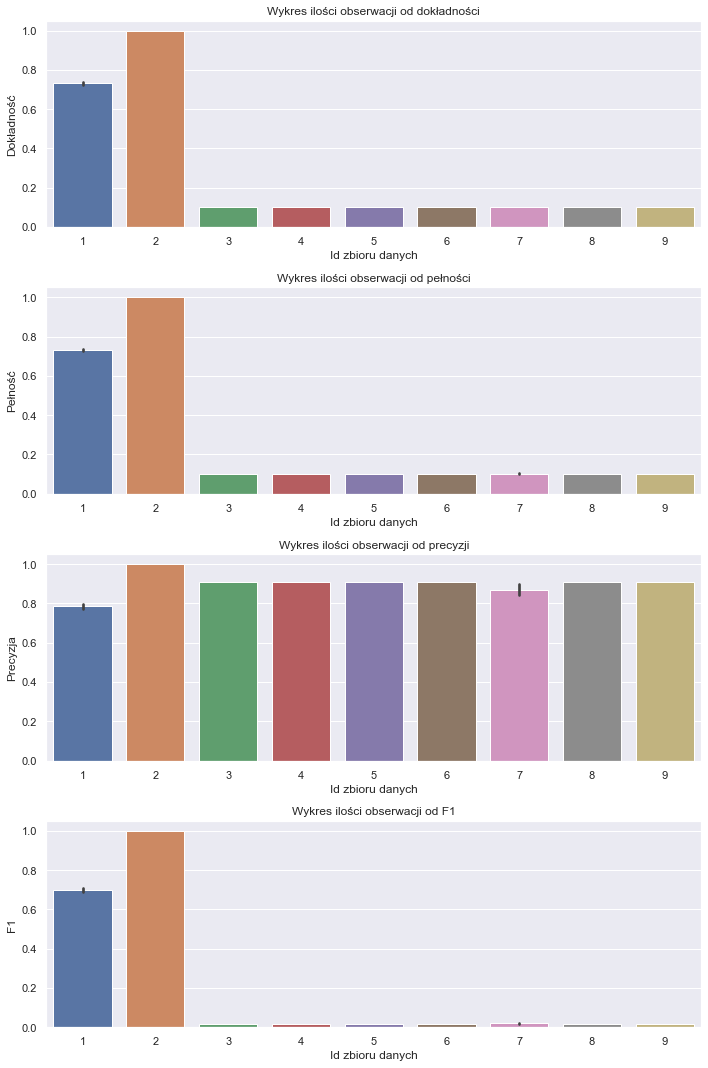

In [45]:
ylabels = ['Dokładność', 'Pełność', 'Precyzja', 'F1']
titles = ['dokładności', 'pełności', 'precyzji', 'F1']


fig, ax = plt.subplots(4, 1, figsize=(10, 15))
ax = ax.flatten()

for axis , ylabel, title, score in zip(ax, ylabels, titles, scores):
    sns.barplot(x='dataset_id',
                    y=score,
                    data=results,
                    ax=axis)
    axis.set_title(f'Wykres ilości obserwacji od {title}')
    axis.set_xlabel('Id zbioru danych')
    axis.set_ylabel(ylabel)
plt.tight_layout()
plt.show()

# Visualizations - Noise

In [90]:
params = {
    'beta': [-2, -1, 0, 1, 2],
    'SNR': [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'n_iters' : [15],
    'n_hiddens': [6]
}

results = pd.read_csv(r'results\result_noise.csv', 
                     index_col=['Unnamed: 0'])

ints = ['n_iter', 'n_hidden', 'beta', 'SNR']
scores = ['accuracy', 'recall', 'precision', 'F1_score']

results[ints] = results[ints].astype('int64')
for i in scores:
    results[i] = results[i].apply(lambda x: np.round(x, 3))    

## Tabele

In [92]:
mask = results['SNR']==9
temp = results[mask].groupby(['beta'])[scores].max()
temp

,accuracy,recall,precision,F1_score
beta,,,,
-2,0.889,0.889,0.944,0.852
-1,0.889,0.889,0.944,0.852
0,0.889,0.889,0.944,0.852
1,1.000,1.000,1.000,1.000
2,1.000,1.000,1.000,1.000


In [97]:
latex_table_generator(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'], [r'$\beta$'])

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{$\beta$} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF}-2 & 0.889 & 0.889 & 0.944 & 0.852\\ \hline 
\cellcolor[HTML]{EFEFEF}-1 & 0.889 & 0.889 & 0.944 & 0.852\\ \hline 
\cellcolor[HTML]{EFEFEF}0 & 0.889 & 0.889 & 0.944 & 0.852\\ \hline 
\cellcolor[HTML]{EFEFEF}1 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\cellcolor[HTML]{EFEFEF}2 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\end{tabular}
\caption{}
\label{tab:}
\end{table}


In [99]:
mask = results['SNR']==-2
temp = results[mask].groupby(['beta'])[scores].max()
temp

,accuracy,recall,precision,F1_score
beta,,,,
-2,0.183,0.183,0.632,0.106
-1,0.211,0.211,0.661,0.141
0,0.200,0.200,0.654,0.129
1,0.472,0.472,0.801,0.363
2,0.344,0.344,0.770,0.320


In [100]:
latex_table_generator(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'], [r'$\beta$'])

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{$\beta$} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF}-2 & 0.183 & 0.183 & 0.632 & 0.106\\ \hline 
\cellcolor[HTML]{EFEFEF}-1 & 0.211 & 0.211 & 0.661 & 0.141\\ \hline 
\cellcolor[HTML]{EFEFEF}0 & 0.2 & 0.2 & 0.654 & 0.129\\ \hline 
\cellcolor[HTML]{EFEFEF}1 & 0.472 & 0.472 & 0.801 & 0.363\\ \hline 
\cellcolor[HTML]{EFEFEF}2 & 0.344 & 0.344 & 0.77 & 0.32\\ \hline 
\end{tabular}
\caption{}
\label{tab:}
\end{table}


In [103]:
temp = pd.pivot_table(index='SNR', columns='beta', values='accuracy', data = results)
temp 

beta,-2,-1,0,1,2
SNR,,,,,
-2,0.183,0.211,0.200,0.472,0.344
-1,0.222,0.222,0.172,0.561,0.378
0,0.328,0.272,0.261,0.578,0.400
1,0.506,0.344,0.272,0.594,0.456
2,0.600,0.444,0.372,0.644,0.544
3,0.667,0.650,0.600,0.700,0.628
4,0.667,0.667,0.772,0.722,0.656
5,0.772,0.794,0.883,0.761,0.706
6,0.889,0.889,0.889,0.811,0.839


## Heatmapa

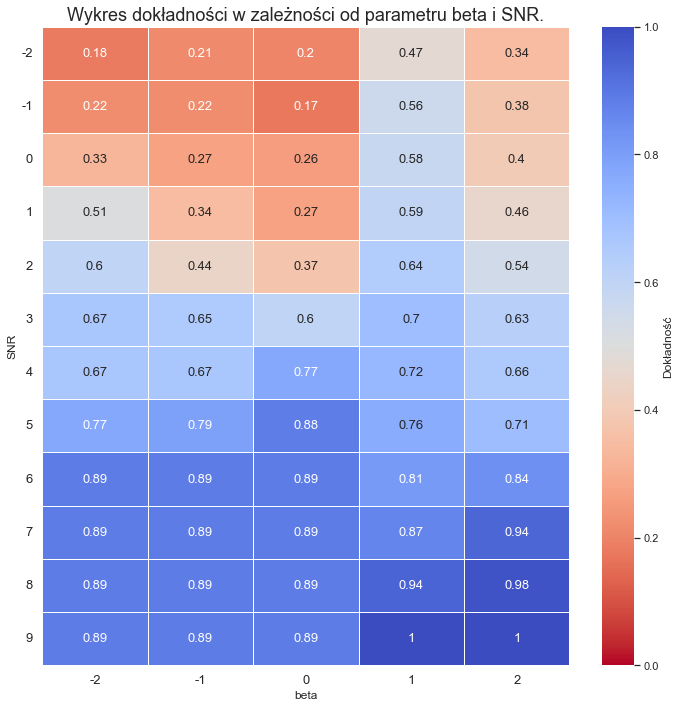

In [148]:
fig = plt.figure(figsize=(10, 10))

sns.heatmap(data=temp, vmin=0, vmax=1,
           annot=True, cmap='coolwarm_r', linewidths=.5, 
            annot_kws={'fontsize': 13},
           cbar_kws={'label': 'Dokładność'})
plt.yticks(rotation=0, fontsize=13)
plt.xticks(fontsize=13)
plt.title('Wykres dokładności w zależności od parametru beta i SNR.', fontsize=18)
plt.tight_layout()
plt.show()

In [149]:
fig.savefig(r'vis\noise_snr_beta.png')

## Wykres 1

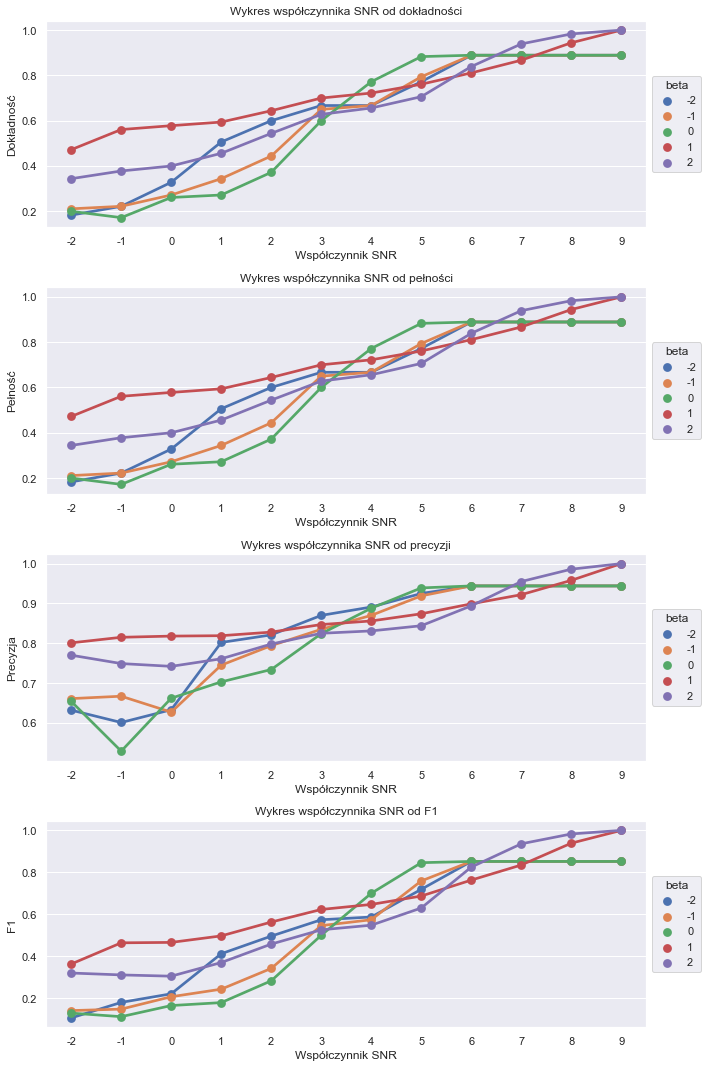

In [101]:
ylabels = ['Dokładność', 'Pełność', 'Precyzja', 'F1']
titles = ['dokładności', 'pełności', 'precyzji', 'F1']


fig, ax = plt.subplots(4, 1, figsize=(10, 15))
ax = ax.flatten()

for axis , ylabel, title, score in zip(ax, ylabels, titles, scores):
    sns.pointplot(x='SNR',
                    y=score,
                    hue='beta',
                    data=results,
                    ax=axis)
    axis.set_title(f'Wykres współczynnika SNR od {title}')
    axis.set_xlabel('Współczynnik SNR')
    axis.set_ylabel(ylabel)
    axis.legend(title='beta', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [102]:
fig.savefig(r'vis\point_snr_beta.png')

# Visualizations - Noise on noise

In [3]:
params = {
    'beta': [-2, -1, 0, 1, 2],
    'SNR': [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'n_iters' : [15],
    'n_hiddens': [6]
}

results = pd.read_csv(r'results\result_noise_beta_-2_snr_9.csv', 
                     index_col=['Unnamed: 0'])

ints = ['n_iter', 'n_hidden', 'beta', 'SNR']
scores = ['accuracy', 'recall', 'precision', 'F1_score']

results[ints] = results[ints].astype('int64')
for i in scores:
    results[i] = results[i].apply(lambda x: np.round(x, 3))    

## Tabele

In [9]:
mask = results['SNR']==9
temp = results[mask].groupby(['beta'])[scores].max()
temp

,accuracy,recall,precision,F1_score
beta,,,,
-2,1.000,1.000,1.000,1.000
-1,1.000,1.000,1.000,1.000
0,1.000,1.000,1.000,1.000
1,0.806,0.806,0.887,0.772
2,0.922,0.922,0.943,0.921


In [10]:
latex_table_generator(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'], [r'$\beta$'])

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{$\beta$} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF}-2 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\cellcolor[HTML]{EFEFEF}-1 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\cellcolor[HTML]{EFEFEF}0 & 1.0 & 1.0 & 1.0 & 1.0\\ \hline 
\cellcolor[HTML]{EFEFEF}1 & 0.806 & 0.806 & 0.887 & 0.772\\ \hline 
\cellcolor[HTML]{EFEFEF}2 & 0.922 & 0.922 & 0.943 & 0.921\\ \hline 
\end{tabular}
\caption{}
\label{tab:}
\end{table}


In [11]:
mask = results['SNR']==-2
temp = results[mask].groupby(['beta'])[scores].max()
temp

,accuracy,recall,precision,F1_score
beta,,,,
-2,0.539,0.539,0.761,0.441
-1,0.372,0.372,0.671,0.270
0,0.494,0.494,0.771,0.411
1,0.489,0.489,0.832,0.454
2,0.272,0.272,0.733,0.341


In [12]:
latex_table_generator(temp, ['Dokładność', 'Pełność', 'Precyzja', 'Miara $F_1$'], [r'$\beta$'])

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{$\beta$} & \textbf{Dokładność} & \textbf{Pełność} & \textbf{Precyzja} & \textbf{Miara $F_1$}\\ \hline 
\cellcolor[HTML]{EFEFEF}-2 & 0.539 & 0.539 & 0.761 & 0.441\\ \hline 
\cellcolor[HTML]{EFEFEF}-1 & 0.372 & 0.372 & 0.671 & 0.27\\ \hline 
\cellcolor[HTML]{EFEFEF}0 & 0.494 & 0.494 & 0.771 & 0.411\\ \hline 
\cellcolor[HTML]{EFEFEF}1 & 0.489 & 0.489 & 0.832 & 0.454\\ \hline 
\cellcolor[HTML]{EFEFEF}2 & 0.272 & 0.272 & 0.733 & 0.341\\ \hline 
\end{tabular}
\caption{}
\label{tab:}
\end{table}


## Heatmapa

In [13]:
temp = pd.pivot_table(index='SNR', columns='beta', values='accuracy', data = results)

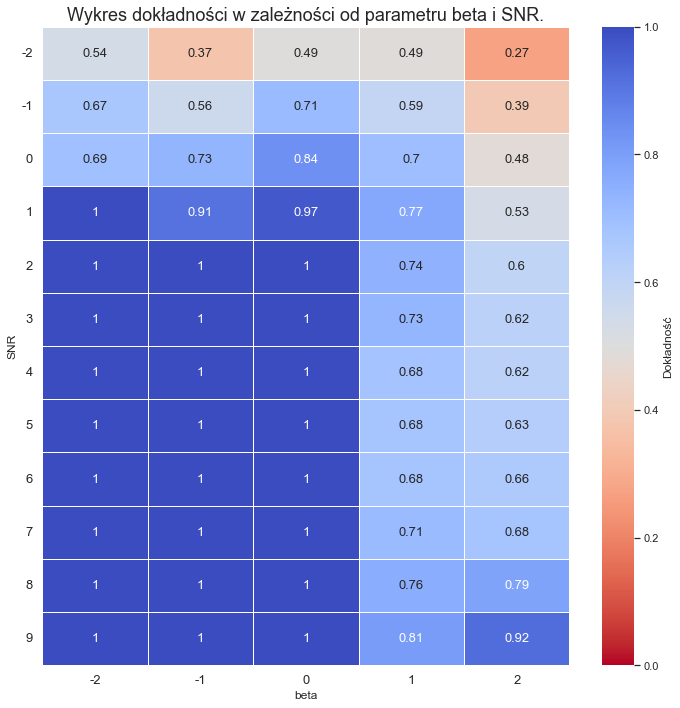

In [14]:
fig = plt.figure(figsize=(10, 10))

sns.heatmap(data=temp, vmin=0, vmax=1,
           annot=True, cmap='coolwarm_r', linewidths=.5, 
            annot_kws={'fontsize': 13},
           cbar_kws={'label': 'Dokładność'})
plt.yticks(rotation=0, fontsize=13)
plt.xticks(fontsize=13)
plt.title('Wykres dokładności w zależności od parametru beta i SNR.', fontsize=18)
plt.tight_layout()
plt.show()

In [26]:
fig.savefig(r'vis\noise_on_noise_snr_beta.png')

## Wykres 1

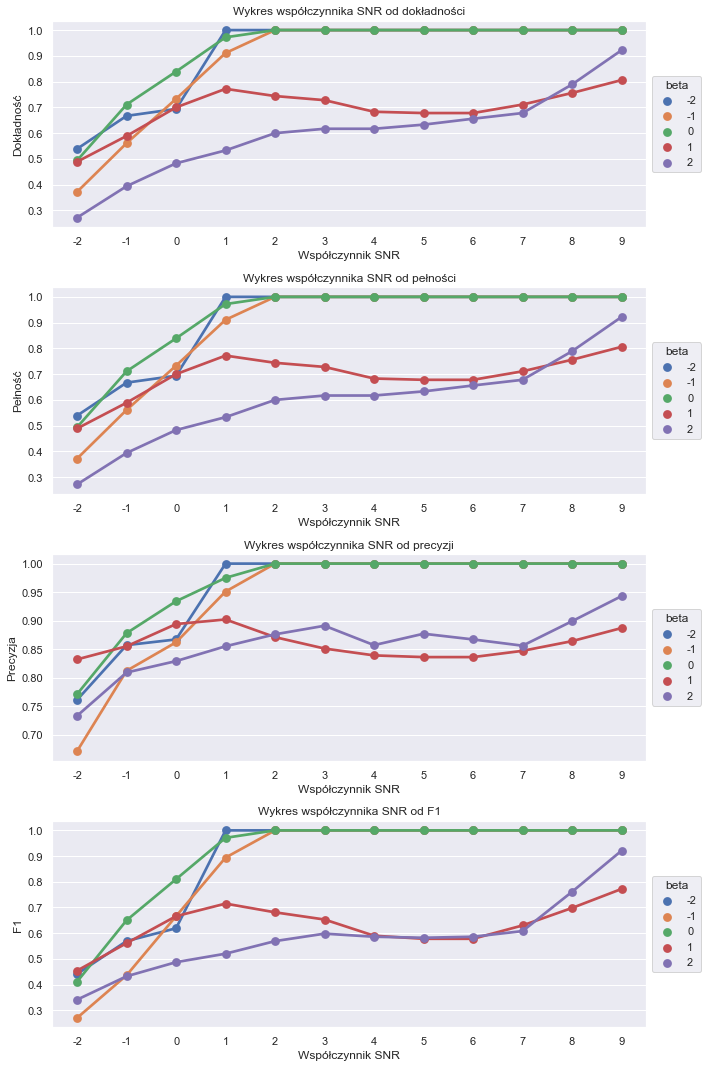

In [27]:
ylabels = ['Dokładność', 'Pełność', 'Precyzja', 'F1']
titles = ['dokładności', 'pełności', 'precyzji', 'F1']


fig, ax = plt.subplots(4, 1, figsize=(10, 15))
ax = ax.flatten()

for axis , ylabel, title, score in zip(ax, ylabels, titles, scores):
    sns.pointplot(x='SNR',
                    y=score,
                    hue='beta',
                    data=results,
                    ax=axis)
    axis.set_title(f'Wykres współczynnika SNR od {title}')
    axis.set_xlabel('Współczynnik SNR')
    axis.set_ylabel(ylabel)
    axis.legend(title='beta', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [28]:
fig.savefig(r'vis\point_noise_on_noise_snr_beta.png')

# Visualizations - comparison noise and noise on noise 

In [16]:
use_cols = ['Unnamed: 0', 'beta', 'SNR', 'accuracy', 'recall', 'precision',
       'F1_score']
result_on_noise = pd.read_csv(r'results\result_noise_beta_-2_snr_9.csv', 
                     index_col=['Unnamed: 0'], usecols=use_cols)
results = pd.read_csv(r'results\result_noise.csv', 
                     index_col=['Unnamed: 0'], usecols=use_cols)

ints = ['beta', 'SNR']
scores = ['accuracy', 'recall', 'precision', 'F1_score']

result_on_noise[ints] = result_on_noise[ints].astype('int64')
for i in scores:
    result_on_noise[i] = result_on_noise[i].apply(lambda x: np.round(x, 3))    
results[ints] = results[ints].astype('int64')
for i in scores:
    results[i] = results[i].apply(lambda x: np.round(x, 3))    

In [17]:
compare = results.copy()

In [18]:
for score in scores:
    compare[score] = result_on_noise[score] - results[score]

In [23]:
def highlight_pos(cell):
    if type(cell) != str and cell < 0 :
        return 'color: red'
    elif type(cell) != str and cell == 0:
        return 'color: orange'
    else:
        return 'color: green'
  
temp = pd.pivot_table(index='SNR', columns='beta', values='accuracy', data=compare)
temp.style.applymap(highlight_pos) 

beta,-2,-1,0,1,2
SNR,,,,,
-2,0.356000,0.161000,0.294000,0.017000,-0.072000
-1,0.445000,0.339000,0.539000,0.028000,0.016000
0,0.366000,0.461000,0.578000,0.122000,0.083000
1,0.494000,0.567000,0.700000,0.178000,0.077000
2,0.400000,0.556000,0.628000,0.100000,0.056000
3,0.333000,0.350000,0.400000,0.028000,-0.011000
4,0.333000,0.333000,0.228000,-0.039000,-0.039000
5,0.228000,0.206000,0.117000,-0.083000,-0.073000
6,0.111000,0.111000,0.111000,-0.133000,-0.183000


In [24]:
latex_table_generator_comparison(temp)

\begin{table}[]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rowcolor[HTML]{C0C0C0} \textbf{$\beta$} & \textbf{-2} & \textbf{-1} & \textbf{0} & \textbf{1} & \textbf{2} \\ \hline
\rowcolor[HTML]{C0C0C0}$\mathbf{\mathit{SNR}_{dB}}$ }  & \multicolumn{5}{c|}{}\\ \hline 
\cellcolor[HTML]{EFEFEF}-2 & \cellcolor[HTML]{9AFF99}0.356 & \cellcolor[HTML]{9AFF99}0.161 & \cellcolor[HTML]{9AFF99}0.294 & \cellcolor[HTML]{9AFF99}0.017 & \cellcolor[HTML]{FFCCC9}-0.072\\ \hline 
\cellcolor[HTML]{EFEFEF}-1 & \cellcolor[HTML]{9AFF99}0.445 & \cellcolor[HTML]{9AFF99}0.339 & \cellcolor[HTML]{9AFF99}0.539 & \cellcolor[HTML]{9AFF99}0.028 & \cellcolor[HTML]{9AFF99}0.016\\ \hline 
\cellcolor[HTML]{EFEFEF}0 & \cellcolor[HTML]{9AFF99}0.366 & \cellcolor[HTML]{9AFF99}0.461 & \cellcolor[HTML]{9AFF99}0.578 & \cellcolor[HTML]{9AFF99}0.122 & \cellcolor[HTML]{9AFF99}0.083\\ \hline 
\cellcolor[HTML]{EFEFEF}1 & \cellcolor[HTML]{9AFF99}0.494 & \cellcolor[HTML]{9AFF99}0.567 & \cellcolor[HTML]{9AFF99}0.7 & \cellcolor[HTML

In [20]:
temp = pd.pivot_table(index='SNR', columns='beta', values='recall', data=compare)
temp.style.applymap(highlight_pos) 

beta,-2,-1,0,1,2
SNR,,,,,
-2,0.356000,0.161000,0.294000,0.017000,-0.072000
-1,0.445000,0.339000,0.539000,0.028000,0.016000
0,0.366000,0.461000,0.578000,0.122000,0.083000
1,0.494000,0.567000,0.700000,0.178000,0.077000
2,0.400000,0.556000,0.628000,0.100000,0.056000
3,0.333000,0.350000,0.400000,0.028000,-0.011000
4,0.333000,0.333000,0.228000,-0.039000,-0.039000
5,0.228000,0.206000,0.117000,-0.083000,-0.073000
6,0.111000,0.111000,0.111000,-0.133000,-0.183000


In [21]:
temp = pd.pivot_table(index='SNR', columns='beta', values='precision', data=compare)
temp.style.applymap(highlight_pos) 

beta,-2,-1,0,1,2
SNR,,,,,
-2,0.129000,0.010000,0.117000,0.031000,-0.037000
-1,0.256000,0.145000,0.349000,0.040000,0.060000
0,0.234000,0.235000,0.272000,0.076000,0.087000
1,0.198000,0.206000,0.272000,0.083000,0.094000
2,0.179000,0.206000,0.266000,0.043000,0.078000
3,0.130000,0.165000,0.176000,0.004000,0.066000
4,0.109000,0.130000,0.112000,-0.017000,0.026000
5,0.075000,0.081000,0.061000,-0.038000,0.033000
6,0.056000,0.056000,0.056000,-0.063000,-0.027000


In [22]:
temp = pd.pivot_table(index='SNR', columns='beta', values='F1_score', data=compare)
temp.style.applymap(highlight_pos) 

beta,-2,-1,0,1,2
SNR,,,,,
-2,0.335000,0.129000,0.282000,0.091000,0.021000
-1,0.389000,0.288000,0.538000,0.097000,0.121000
0,0.398000,0.459000,0.645000,0.200000,0.182000
1,0.588000,0.651000,0.792000,0.218000,0.150000
2,0.504000,0.658000,0.717000,0.118000,0.111000
3,0.426000,0.454000,0.500000,0.030000,0.072000
4,0.413000,0.426000,0.300000,-0.057000,0.038000
5,0.281000,0.241000,0.154000,-0.109000,-0.048000
6,0.148000,0.148000,0.148000,-0.185000,-0.239000


## Cost function

In [47]:
cost = pd.read_csv(r'results\cost_search_noise_on_noise.csv', 
                     index_col=['Unnamed: 0'])
results = pd.read_csv(r'results\result_noise.csv', 
                     index_col=['Unnamed: 0'])
changes =  results[['accuracy']].copy()

In [49]:
for model in cost.index:
    path = os.path.join('results', 'result_noise_' +  model + '.csv')
    temp = pd.read_csv(path, 
                     index_col=['Unnamed: 0'])
    changes[model] = temp['accuracy'] - changes['accuracy']
changes = changes.drop(['accuracy'], axis=1)

### Max average changes

In [56]:
changes.mean(axis=0).nlargest(2)

beta_-2_snr_6    0.652778
beta_0_snr_5     0.167870
dtype: float64

In [57]:
results = pd.read_csv(r'results\result_noise_beta_0_snr_5.csv', 
                     index_col=['Unnamed: 0'])

ints = ['n_iter', 'n_hidden', 'beta', 'SNR']
scores = ['accuracy', 'recall', 'precision', 'F1_score']

results[ints] = results[ints].astype('int64')
for i in scores:
    results[i] = results[i].apply(lambda x: np.round(x, 3))    

In [58]:
temp = pd.pivot_table(index='SNR', columns='beta', values='accuracy', data = results)

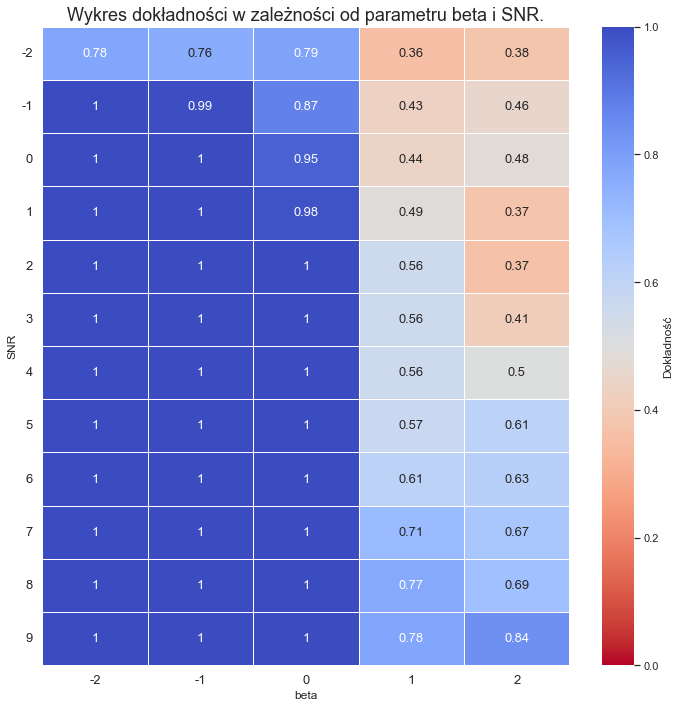

In [59]:
fig = plt.figure(figsize=(10, 10))

sns.heatmap(data=temp, vmin=0, vmax=1,
           annot=True, cmap='coolwarm_r', linewidths=.5, 
            annot_kws={'fontsize': 13},
           cbar_kws={'label': 'Dokładność'})
plt.yticks(rotation=0, fontsize=13)
plt.xticks(fontsize=13)
plt.title('Wykres dokładności w zależności od parametru beta i SNR.', fontsize=18)
plt.tight_layout()
plt.show()